In [ ]:
from IVM import load

ckpt_path = "/mnt/afs/zhengjinliang/20W.bin"
model = load(ckpt_path, low_gpu_memory = False)


In [146]:
import torch
ckpt_path = "/mnt/afs/zhengjinliang/20W.bin"
ckpt = torch.load(ckpt_path, map_location="cpu")
print(ckpt.keys())
print(model.model.load_state_dict(ckpt, strict=False))

/tmp/ipykernel_981237/2862319531.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(ckpt_path, map_location="cpu")


odict_keys(['mask_decoder.pe_layer.positional_encoding_gaussian_matrix', 'prompt_encoder.model.base_model.model.language_model.model.layers.0.self_attn.q_proj.lora_A.default.weight', 'prompt_encoder.model.base_model.model.language_model.model.layers.0.self_attn.q_proj.lora_B.default.weight', 'prompt_encoder.model.base_model.model.language_model.model.layers.0.self_attn.v_proj.lora_A.default.weight', 'prompt_encoder.model.base_model.model.language_model.model.layers.0.self_attn.v_proj.lora_B.default.weight', 'prompt_encoder.model.base_model.model.language_model.model.layers.1.self_attn.q_proj.lora_A.default.weight', 'prompt_encoder.model.base_model.model.language_model.model.layers.1.self_attn.q_proj.lora_B.default.weight', 'prompt_encoder.model.base_model.model.language_model.model.layers.1.self_attn.v_proj.lora_A.default.weight', 'prompt_encoder.model.base_model.model.language_model.model.layers.1.self_attn.v_proj.lora_B.default.weight', 'prompt_encoder.model.base_model.model.language

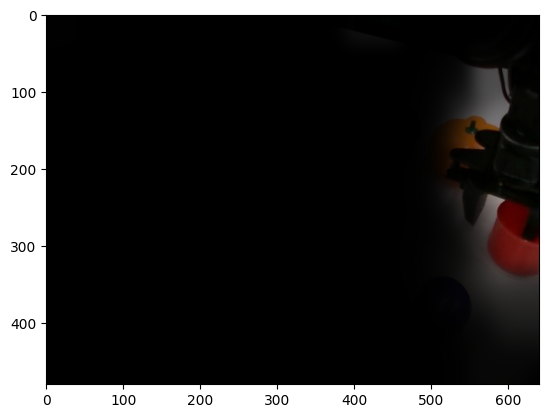

In [156]:
from PIL import Image

image = Image.open("image/demo/robot.jpg") # your image path
instruction = "pick up the red cup" 

result = model.forward_batch([image], [instruction], boxes_threshold=0.2,dilate_kernel_rate=0.05 ,blur_kernel_size = 201,  min_reserved_ratio=0., fill_color=(0,0,0))
from matplotlib import pyplot as plt
import numpy as np
plt.imshow((result['highlight_image'][0]).astype(np.uint8))

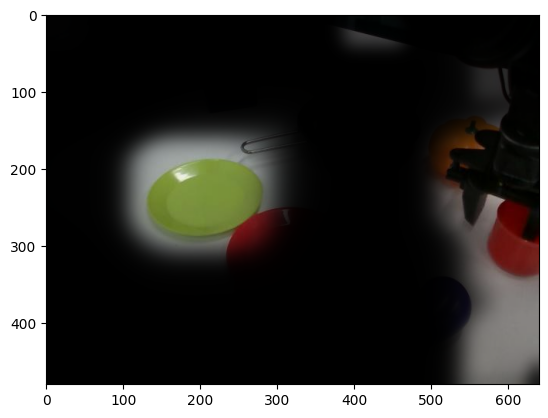

In [155]:
from PIL import Image

image = Image.open("image/demo/robot.jpg") # your image path
instruction = "pick up the red cup and put it on the green pan" 

result = model.forward_batch([image], [instruction], boxes_threshold=0.2,dilate_kernel_rate=0.05 ,blur_kernel_size = 201,  min_reserved_ratio=0., fill_color=(0,0,0))
from matplotlib import pyplot as plt
import numpy as np
plt.imshow((result['highlight_image'][0]).astype(np.uint8))

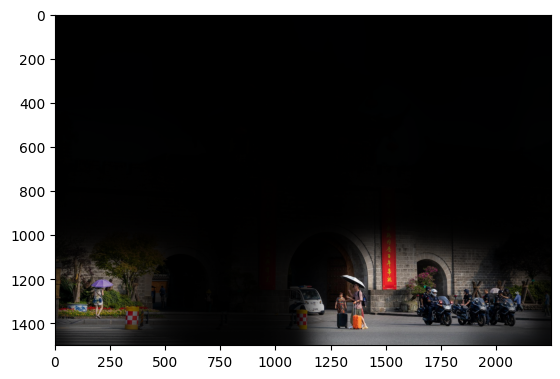

In [148]:
from PIL import Image

image = Image.open("image/demo/VQA.jpg") # your image path
instruction = "Is there anyone holding a purple umbrella?" 

result = model.forward_batch([image], [instruction], boxes_threshold=0.2,dilate_kernel_rate=0.05 ,blur_kernel_size = 1,  min_reserved_ratio=0., fill_color=(0,0,0))
from matplotlib import pyplot as plt
import numpy as np
plt.imshow((result['highlight_image'][0]).astype(np.uint8))

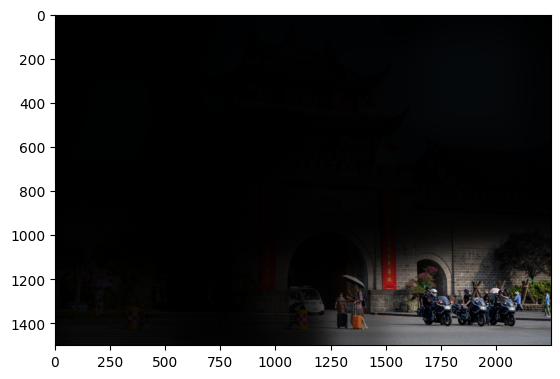

In [149]:
from PIL import Image

image = Image.open("image/demo/VQA.jpg") # your image path
instruction = "How many motocycles are there" 

result = model.forward_batch([image], [instruction], boxes_threshold=0.2,dilate_kernel_rate=0.05 ,blur_kernel_size = 1,  min_reserved_ratio=0., fill_color=(0,0,0))
from matplotlib import pyplot as plt
import numpy as np
plt.imshow((result['highlight_image'][0]).astype(np.uint8))

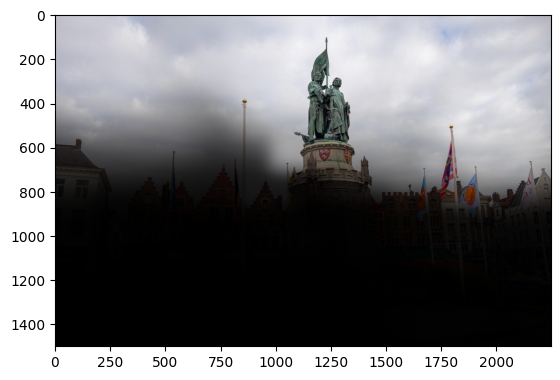

In [150]:
from PIL import Image

image = Image.open("image/demo/VQA2.jpg") # your image path
instruction = "Is there cloud in the sky?" 

result = model.forward_batch([image], [instruction], boxes_threshold=0.2,dilate_kernel_rate=0.05 ,blur_kernel_size = 1,  min_reserved_ratio=0., fill_color=(0,0,0))
from matplotlib import pyplot as plt
import numpy as np
plt.imshow((result['highlight_image'][0]).astype(np.uint8))

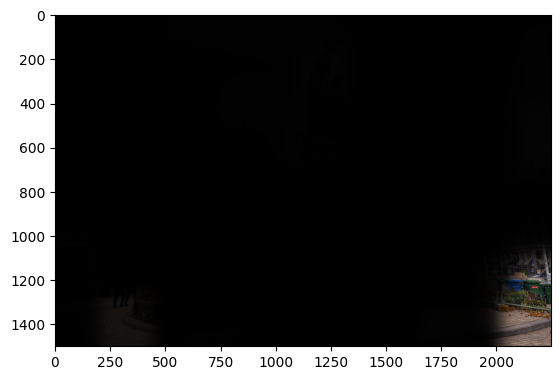

In [151]:
from PIL import Image

image = Image.open("image/demo/VQA2.jpg") # your image path
instruction = "Where can I throw rubbish?" 

result = model.forward_batch([image], [instruction], boxes_threshold=0.2,dilate_kernel_rate=0.05 ,blur_kernel_size = 1,  min_reserved_ratio=0., fill_color=(0,0,0))
from matplotlib import pyplot as plt
import numpy as np
plt.imshow((result['highlight_image'][0]).astype(np.uint8))

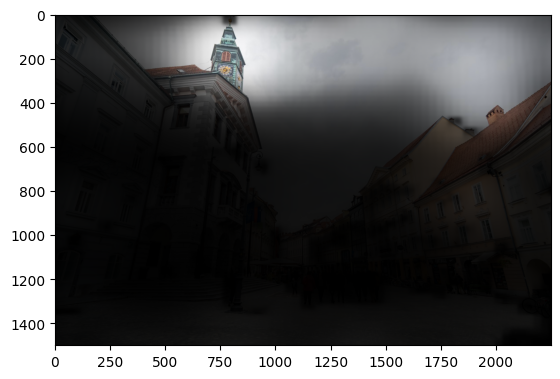

In [152]:
from PIL import Image

image = Image.open("image/demo/VQA3.jpg") # your image path
instruction = "What is the time?" 

result = model.forward_batch([image], [instruction], boxes_threshold=0.2,dilate_kernel_rate=0.01 ,blur_kernel_size = 1,  min_reserved_ratio=0., fill_color=(0,0,0))
from matplotlib import pyplot as plt
import numpy as np
plt.imshow((result['highlight_image'][0]).astype(np.uint8))

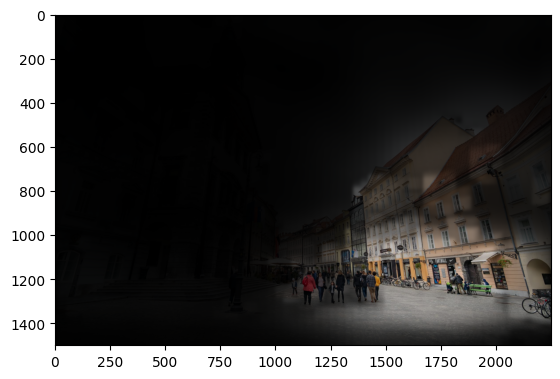

In [154]:
from PIL import Image

image = Image.open("image/demo/VQA3.jpg") # your image path
instruction = "Where can I buy something eat?" 

result = model.forward_batch([image], [instruction], boxes_threshold=0.2,dilate_kernel_rate=0.01 ,blur_kernel_size = 1,  min_reserved_ratio=0., fill_color=(0,0,0))
from matplotlib import pyplot as plt
import numpy as np
plt.imshow((result['highlight_image'][0]).astype(np.uint8))